# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [63]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

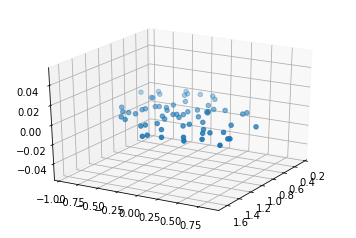

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(25,30)
ax.scatter(x.T[0], y, zdir = 'z')

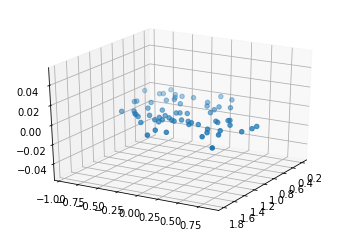

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(25,30)
ax.scatter(x.T[1], y, zdir = 'z')

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

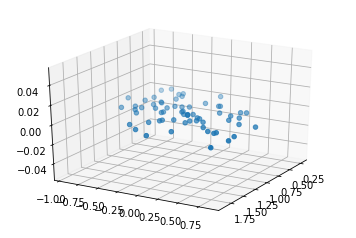

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(25,30)
ax.scatter(x.T[2], y, zdir = 'z')

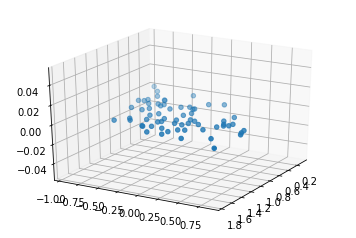

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(25,30)
ax.scatter(x.T[3], y, zdir = 'z')

In [68]:
beta = np.linalg.lstsq(x,y)[0]
beta

array([ 0.19274489,  0.19609362,  0.19856282,  0.42010393, -1.03893572])

In [69]:
pred = np.dot(x, beta)

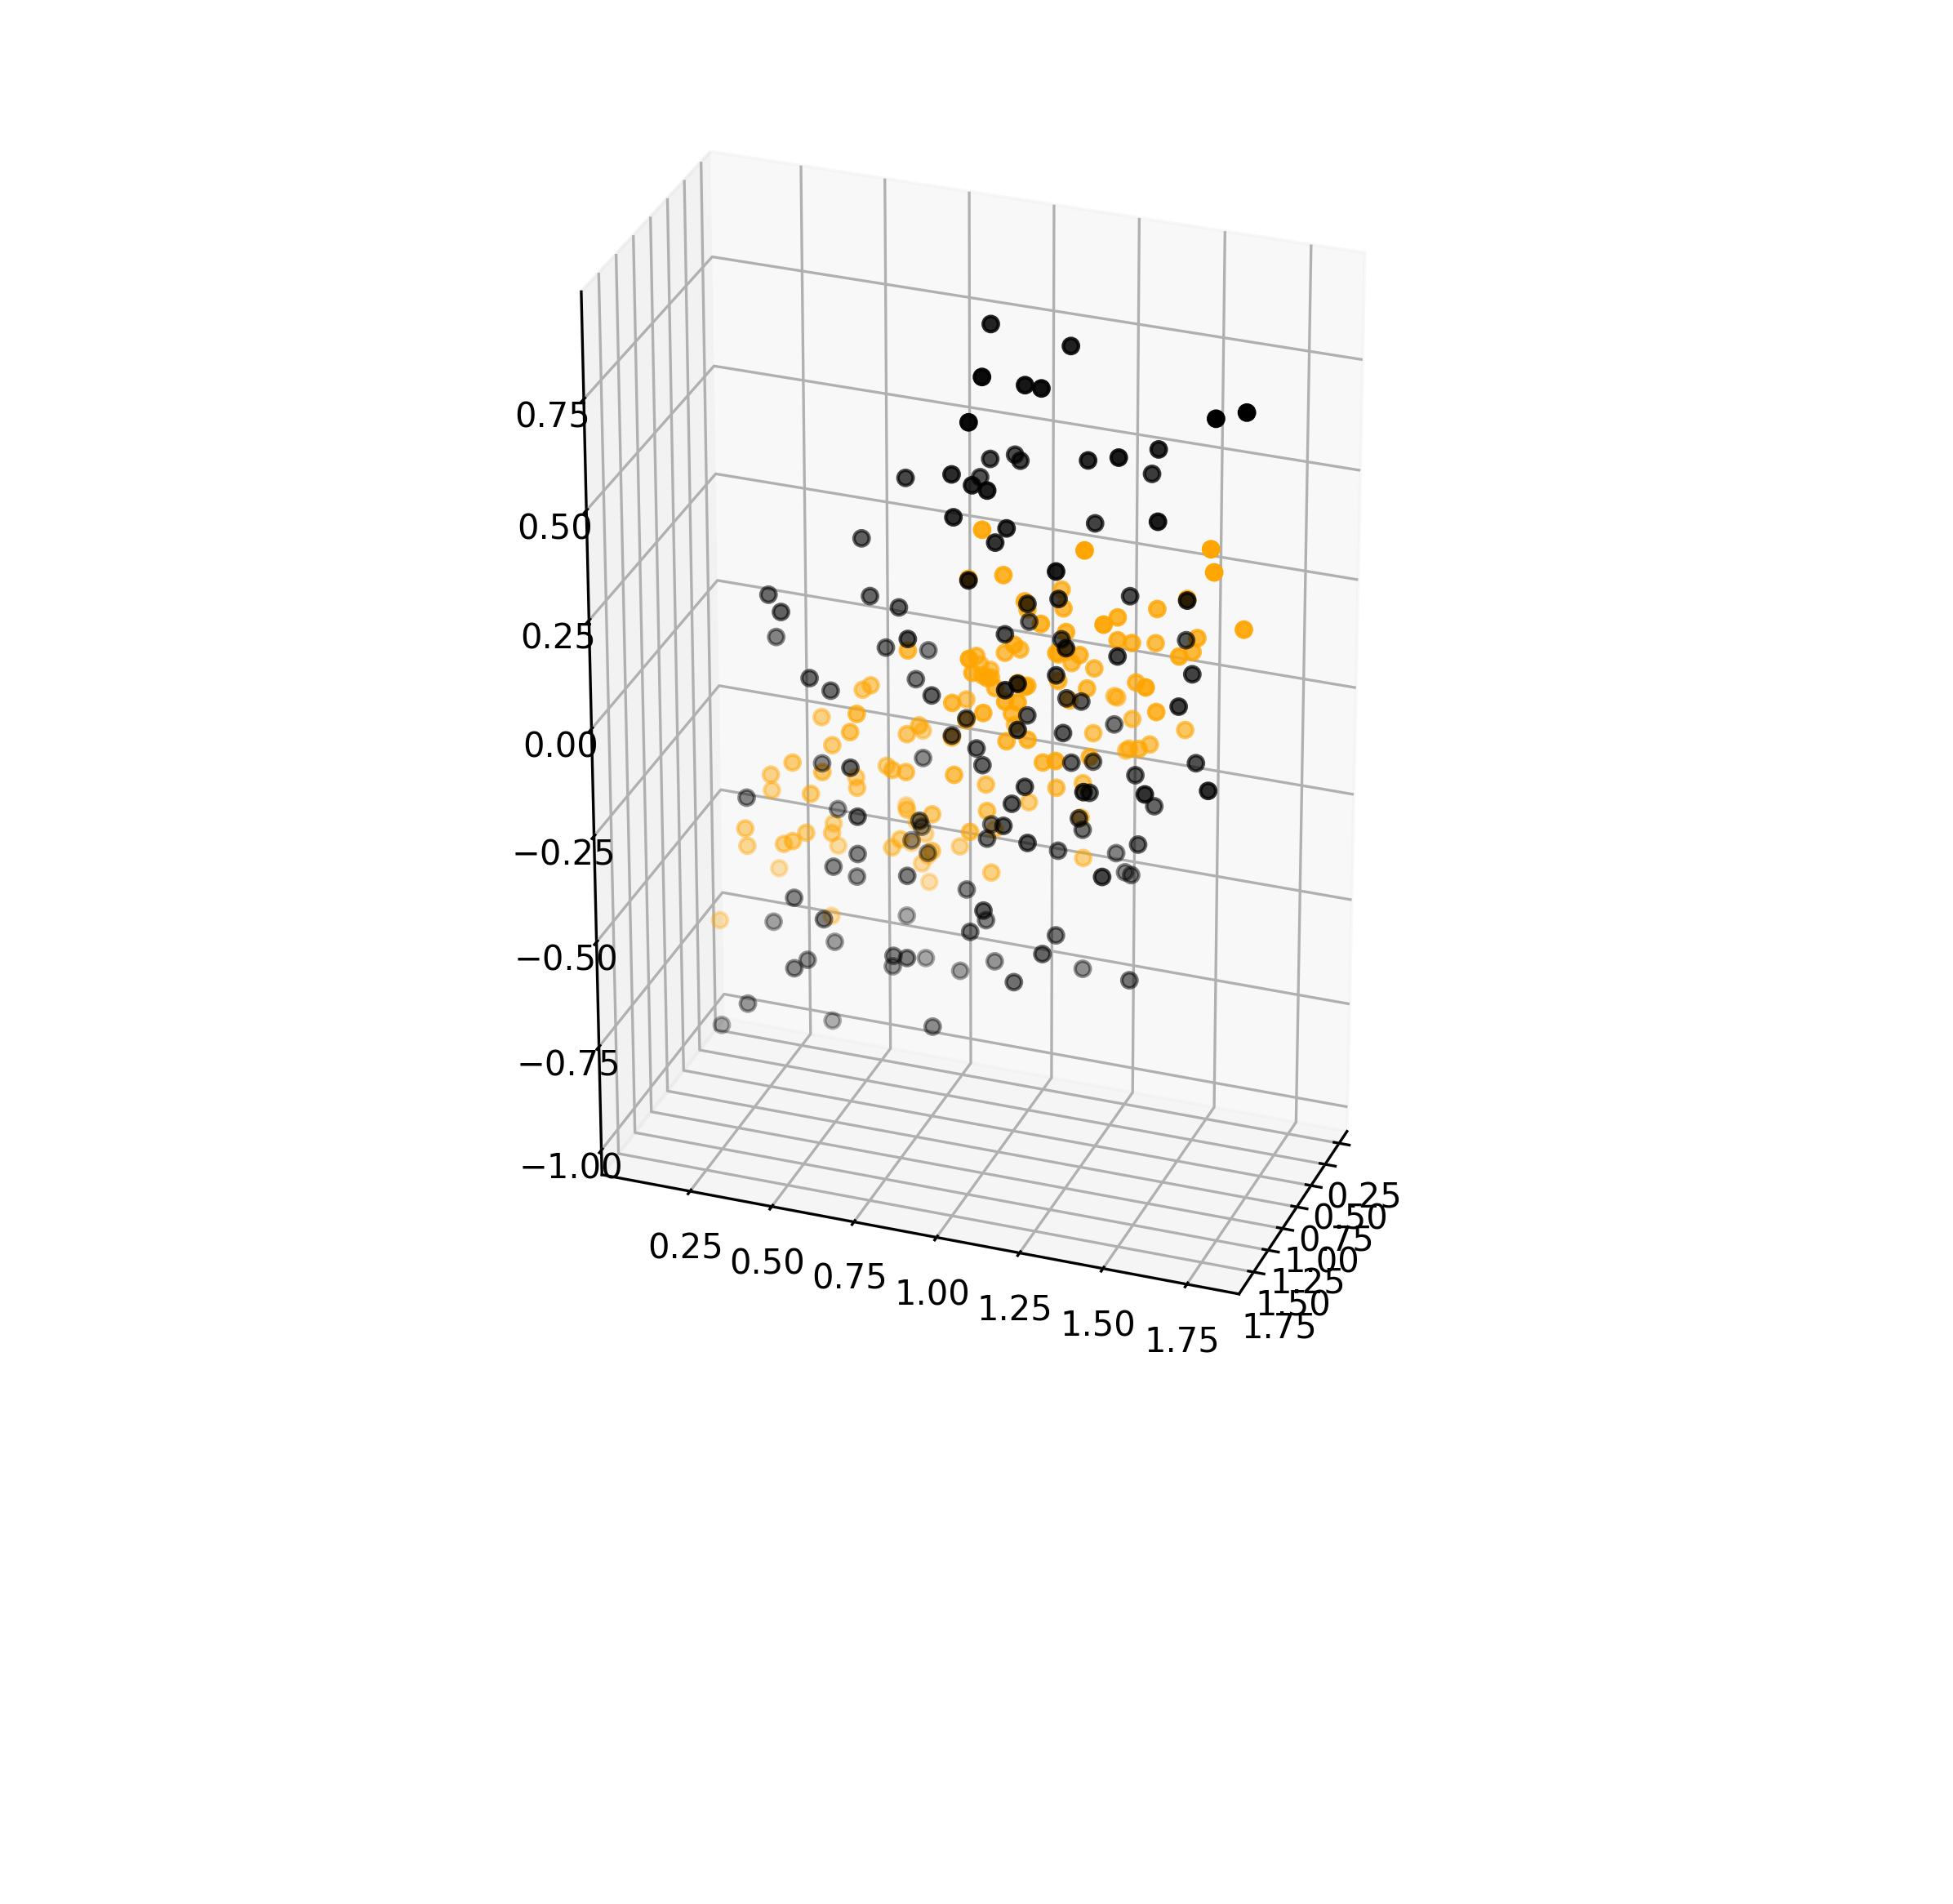

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize = (10, 10), dpi = 300)
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(30,20)
ax.scatter(x.T[0], x.T[1], pred, zdir = 'z', c = 'orange')
ax.scatter(x.T[2], x.T[3], pred, zdir = 'z', c = 'orange')
ax.scatter(x.T[0], x.T[1], y, zdir = 'z', c = 'black')
ax.scatter(x.T[2], x.T[3], y, zdir = 'z', c = 'black')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

credit = pd.read_csv('C:\\Users\\robwr\\Desktop\\mlnn\\data\\Credit.csv', delimiter = ',')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [161]:
credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [221]:
X = credit[['Income', 'Cards', 'Education', 'Limit', 'Balance']].as_matrix()
Y = credit[['Rating']].as_matrix()
credit.describe()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [222]:
n = 400
x = np.array(X)
y = np.array(Y)
X = np.vstack([X, np.ones(len(x.T))]).T

In [223]:
beta = np.linalg.lstsq(x, y)[0]
beta


array([[-0.03050814],
       [ 6.40078571],
       [ 0.97010439],
       [ 0.06902562],
       [-0.00645896]])

In [224]:
pred = np.dot(x, beta)
pred

array([[ 269.77398547],
       [ 483.3621206 ],
       [ 517.69343814],
       [ 675.12319343],
       [ 362.49894513],
       [ 580.87296864],
       [ 256.34991658],
       [ 504.77005381],
       [ 270.13635568],
       [ 497.4325284 ],
       [ 588.45291781],
       [ 124.7576239 ],
       [ 375.80245035],
       [ 484.61229478],
       [ 251.0362794 ],
       [ 207.43074258],
       [ 290.42011956],
       [ 332.45777756],
       [ 448.52408002],
       [ 470.84354634],
       [ 237.4232529 ],
       [ 455.74629204],
       [ 209.89650954],
       [ 392.64048723],
       [ 154.70422384],
       [ 341.15954487],
       [ 294.74397897],
       [ 337.26862808],
       [ 934.91462347],
       [ 421.6996202 ],
       [ 414.93715289],
       [ 235.28968986],
       [ 558.9447346 ],
       [ 160.595102  ],
       [ 208.41009185],
       [ 203.99248392],
       [ 462.34533466],
       [ 460.91247215],
       [ 300.64553924],
       [ 275.44405832],
       [ 261.04285823],
       [ 545.092

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

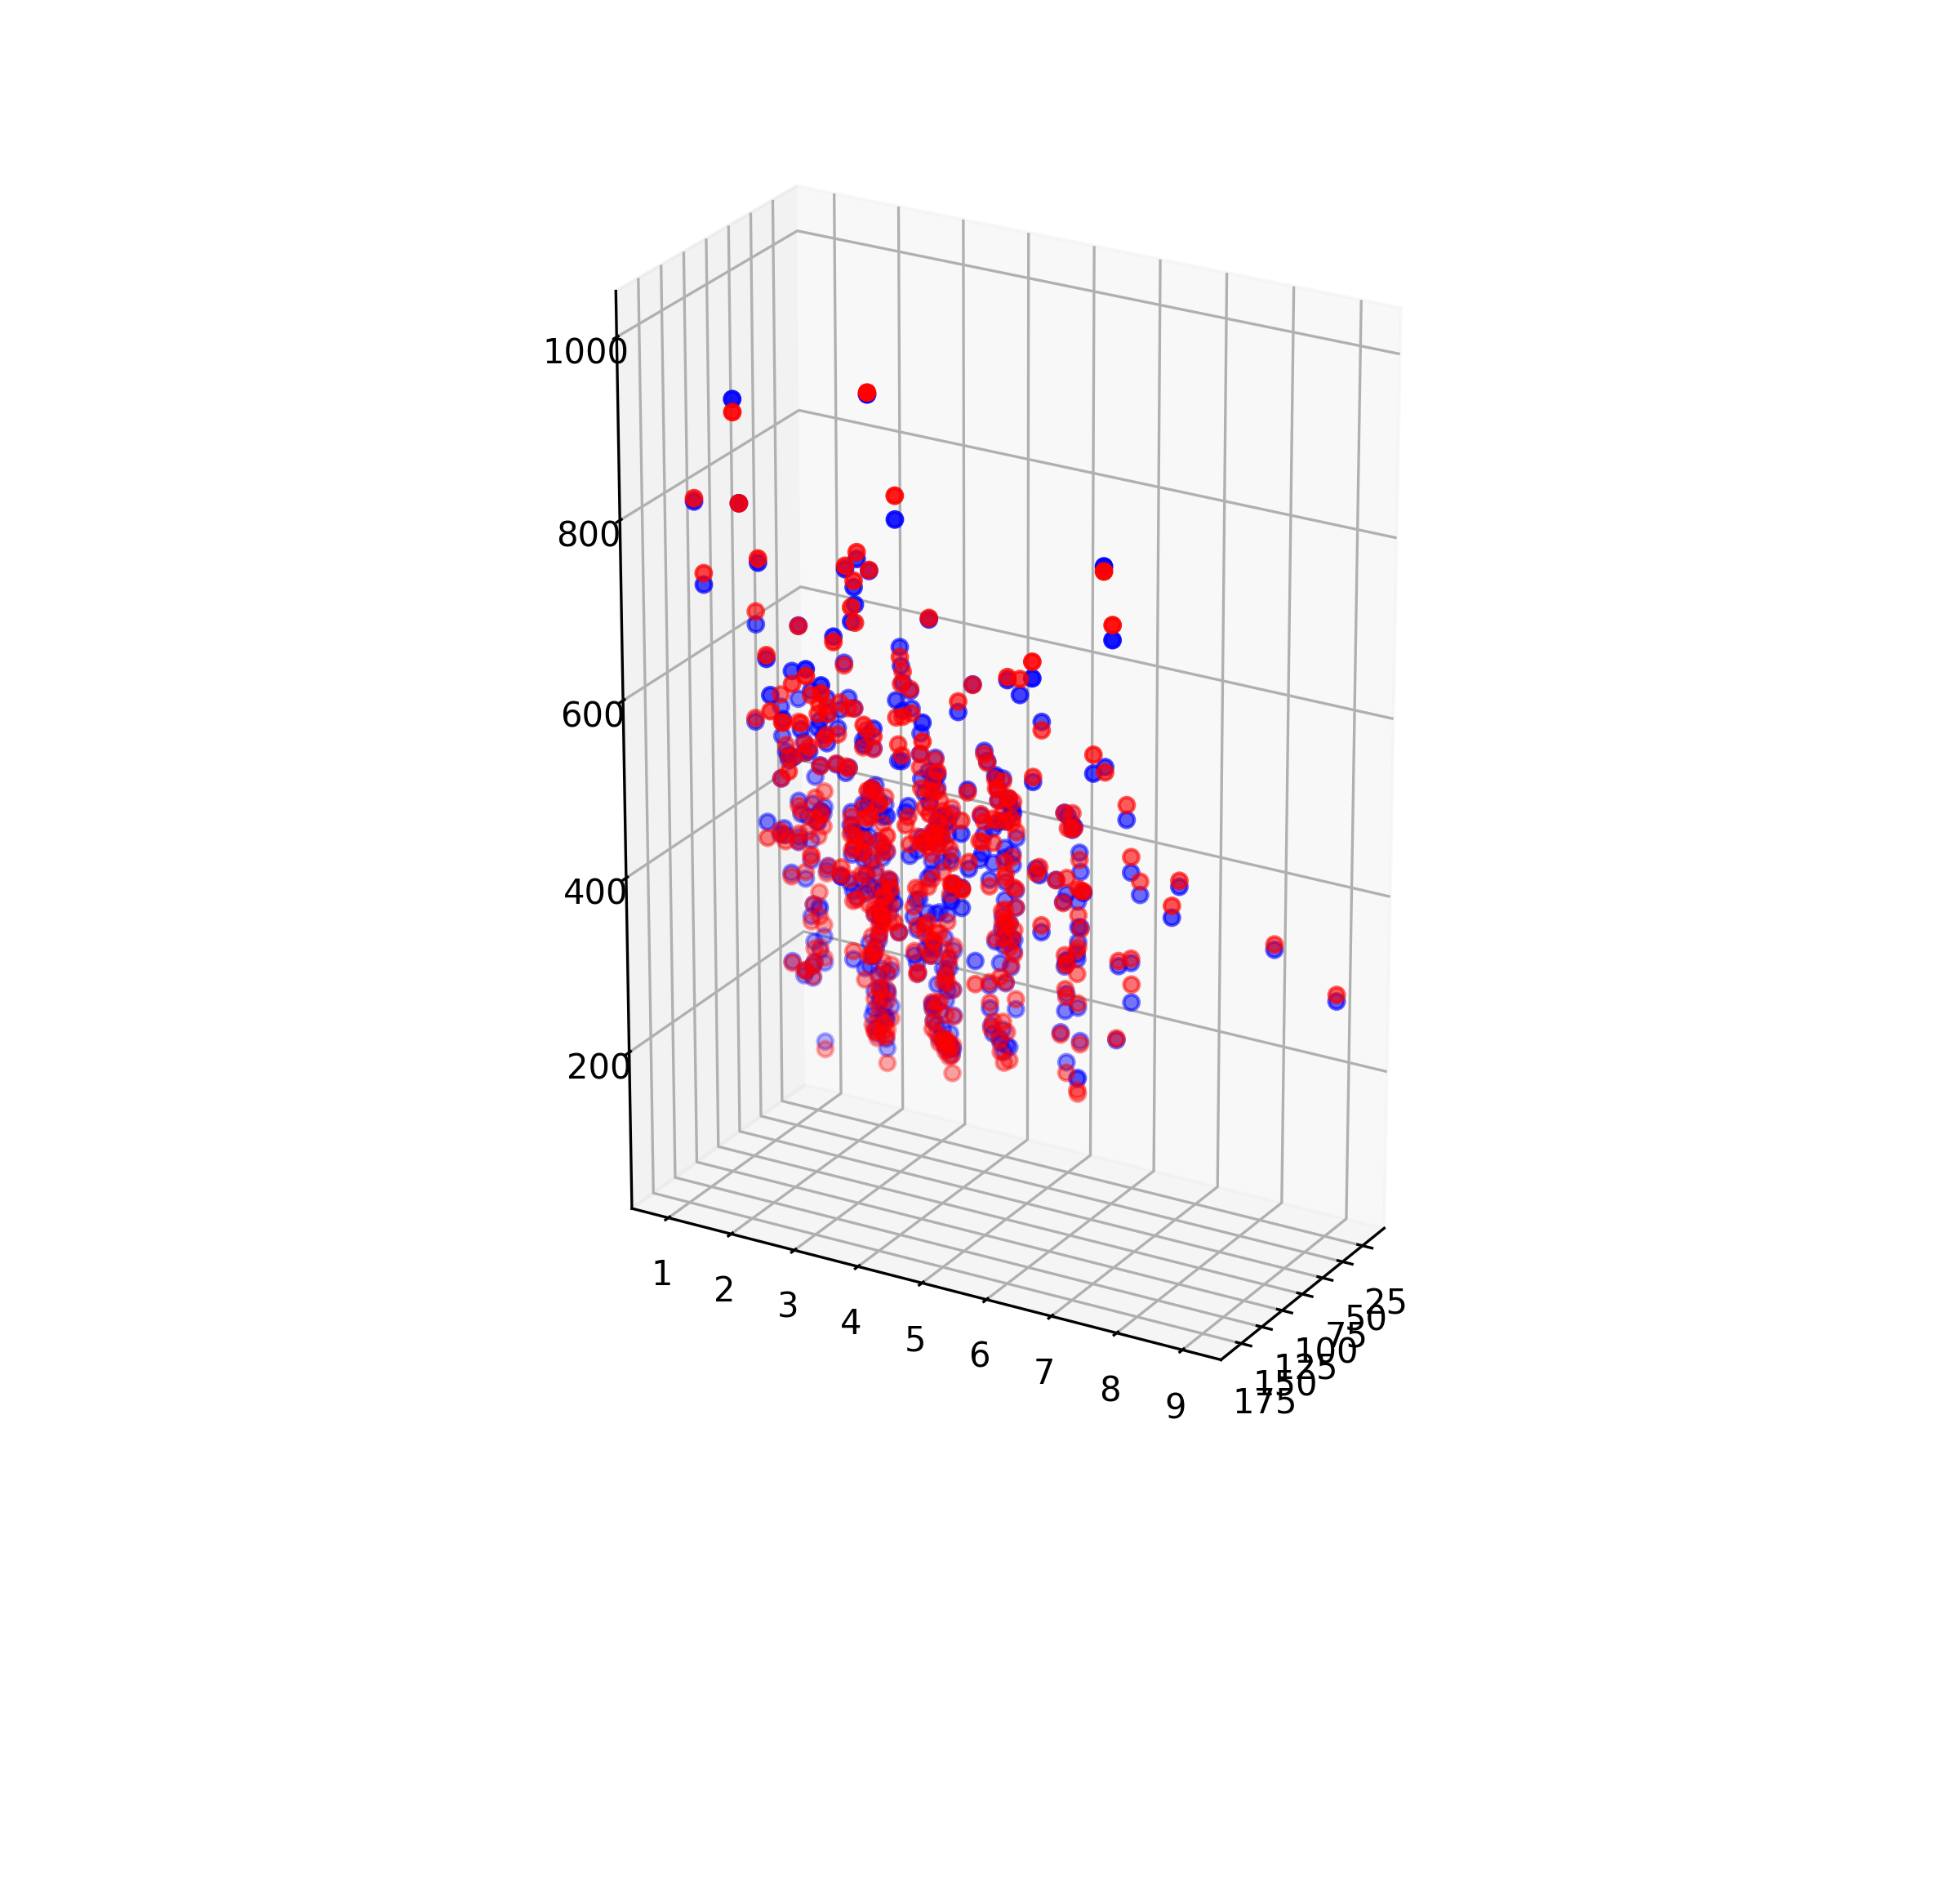

In [227]:
fig = plt.figure(figsize = (10, 10), dpi = 300)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(25, 30)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')